# Linear regression 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('/Users/hamadwaheed/Desktop/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Part I: Research Question

## A.  Describe the purpose of this data analysis by doing the following:  

1.    In the telecommunications industry, customers can choose from multiple service providers 
      and actively switch from one provider to another. Customer “churn” is defined as the 
      percentage of customers who stopped using a provider’s product or service during a certain 
      time frame. In this highly competitive market, some telecommunications industries can 
      experience average annual churn rates as high as 25 percent. Given that it costs 10 times 
      more to acquire a new customer than to retain an existing one, customer retention has now 
      become even more important than customer acquisition.   
      
2.   The objectives or goals of this project: 
     *   estimate an increased life expectancy of costumer's contract with the company: i.e predict whether a certain combination of variables can increase the retention rate, decreasing the churn rate. 
     *   reduce customer churn

# Part II: Method Justification

1. Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). It used in predicting continous variable (Tenure in our case). 
2. Our analysis is carried out using python because of its; 
   * Faster Development and Processing   
   * Powerful Packages
   * Better Data Visualisation   
3. Multiple linear regession is an appropriate technique to use because we can see the effect of multiple x variables and how they impact the dependent Y variable. We also want to see the strength of the relationship between the variables. A company can take into consideration whether there is a strong relationship between variables when predicting what type of packages or products to offer. There will be stronger relationships with certain variables, and we want to find out which ones those are.

# Part III: Data Preparation

### To prepare the data we will start by checking if it is clean and if it has any null points

In [4]:
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))
df.info()


Dimensionality of the data is (10000, 50)
The data set has 10000 cases.
The total number of elements is 500000.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job       

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
df_null =df.isnull().sum(); pr=df.isnull().sum()/df.shape[0]
Nan=pd.concat([df_null,round(pr, 2)], axis=1, keys=["Total of missing values" ,"pourcentage (%)"]) ; Nan  

,Total of missing values,pourcentage (%)
CaseOrder,0,0.0
Customer_id,0,0.0
Interaction,0,0.0
UID,0,0.0
City,0,0.0
State,0,0.0
County,0,0.0
Zip,0,0.0
Lat,0,0.0
Lng,0,0.0


### The data is clean and does not have any missing rows or values, we can proceed with our univariate and bivariate trends

#### The Target Variable

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

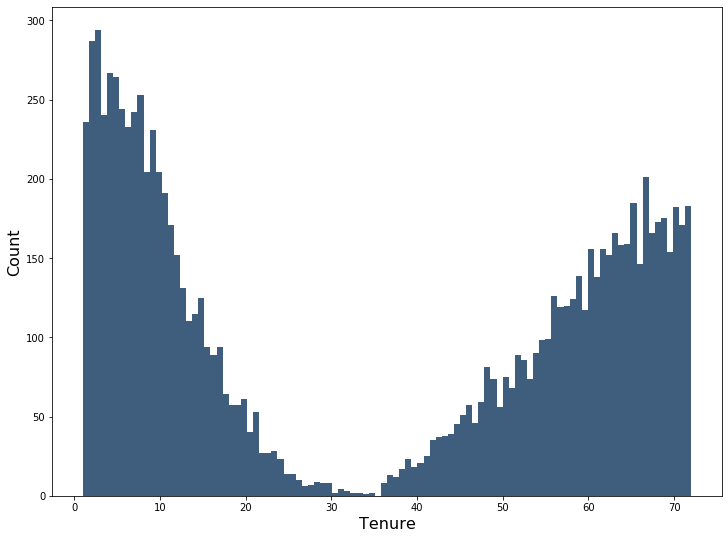

In [7]:

plt.figure(figsize=(12, 9)) 
plt.xlabel("Tenure", fontsize=16)  
plt.ylabel("Count", fontsize=16)
p=plt.hist(df.Tenure.values ,  color="#3F5D7D", bins=100, )
p.index

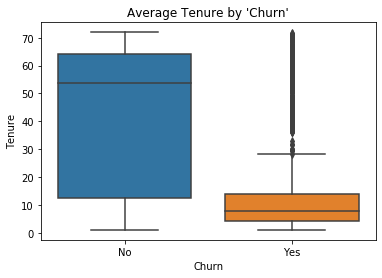

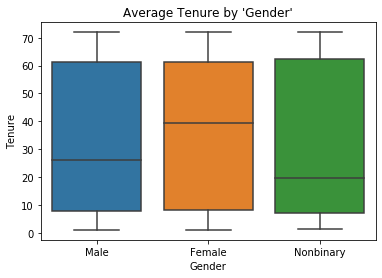

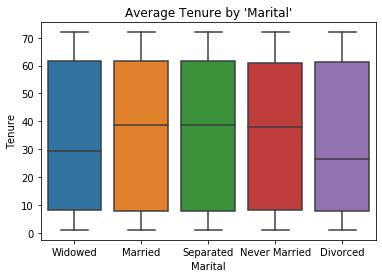

In [8]:
ax=sns.boxplot(x='Churn',y='Tenure',data=df)
ax.set_title("Average Tenure by 'Churn'")
ax.set_ylabel('Tenure')
plt.show() 

ax=sns.boxplot(x='Gender',y='Tenure',data=df)
ax.set_title("Average Tenure by 'Gender'")
ax.set_ylabel('Tenure')
plt.show() 


ax=sns.boxplot(x='Marital',y='Tenure',data=df)
ax.set_title("Average Tenure by 'Marital'")
ax.set_ylabel('Tenure')
plt.show() 

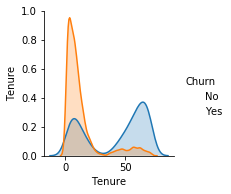

In [9]:
f=df[['Tenure','Churn']]
f.head()
sns.pairplot(f, hue='Churn')

Fro the .head() function earlier we can see Techie, Port_Modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and PaperlessBilling are all boolean values so we will drop these from the Linear Regression Model. We will also drop email because that seems more like a record keeping protocol.

# Part IV: Model Comparison and Analysis

### Initial Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split #to create validation data set
from sklearn import metrics

X=df.drop(["Tenure","Techie","Port_modem","Tablet","Phone","Multiple","OnlineSecurity",
           "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
           "PaperlessBilling","Marital"], axis=1)
Y=df["Tenure"]
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9896
r2:  0.9896
MAE:  2.3675
MSE:  7.3515
RMSE:  2.7114


Here we have our initial Multiple Linear Regression Model. We will be looking ah the r2, MAE(mean absolute error), MSE(mean square error_, and RMSE(Root mean square error). We will focus on the r2. The r2 tells you how many points will fall on the regression line, the higher the r2 the more accuracy the model has. the r2 here is .9896 or %98.96. That's a very high accuracy.An initial look at our model says it will most likely make accurate predictions. The other 3 metrics will give us an idea of the error rate, something to also take into consideration.

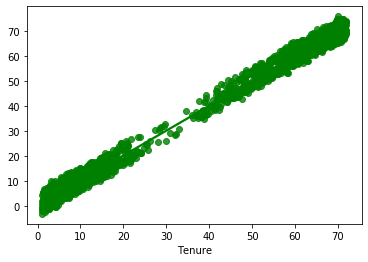

In [11]:
sns.regplot(x=y_test, y=predictions, ci=None, color="g")

In [12]:
residuals = y_test - predictions

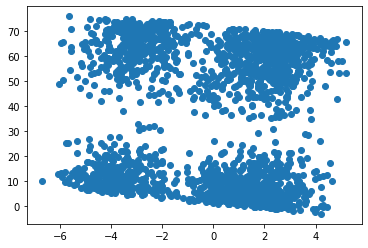

In [13]:
plt.scatter(residuals,predictions)

plt.show()

Above we have 2 residual Plots, these illustrate the accuracy of the model, the first one has plotted predicted values against y_test values. The purpose of this is to get an idea of how effectively the model is working.The points fall against the line pretty close so we can tell that the model has high predictive accuracy. The second plot is a residual scatter plot. It is a plot of the independent variables and the residuals. it should portay no discernable linear pattern, if it does that means the data is biased in some way. This could mean it has autocorrelation, which means there is a degree of similairity. We do not want autocorrelation, this plot justifies our integrity in the regression model, and the variables/data in general. We cannot see any discernable linear pattern.

### We will construct a correlation matrix to statistically determine in what way we should reduce the model

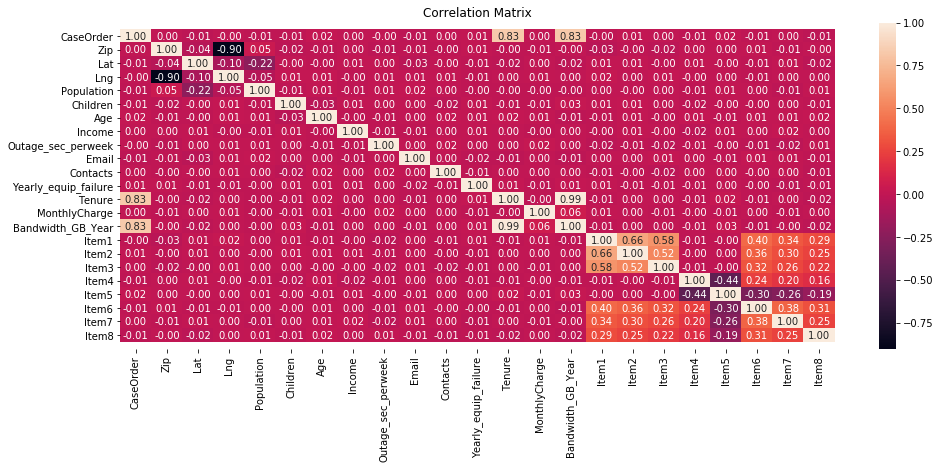

In [14]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f') # Plot of the correlation matrix
bottom, top = ax.get_ylim() # Figure limits
ax.set_ylim(bottom+0.5, top-0.5) # Setting figure limits
plt.title('Correlation Matrix') # Figure title
plt.show()

### We will filter out the values with a correlation of less than .30 and larger than -.30

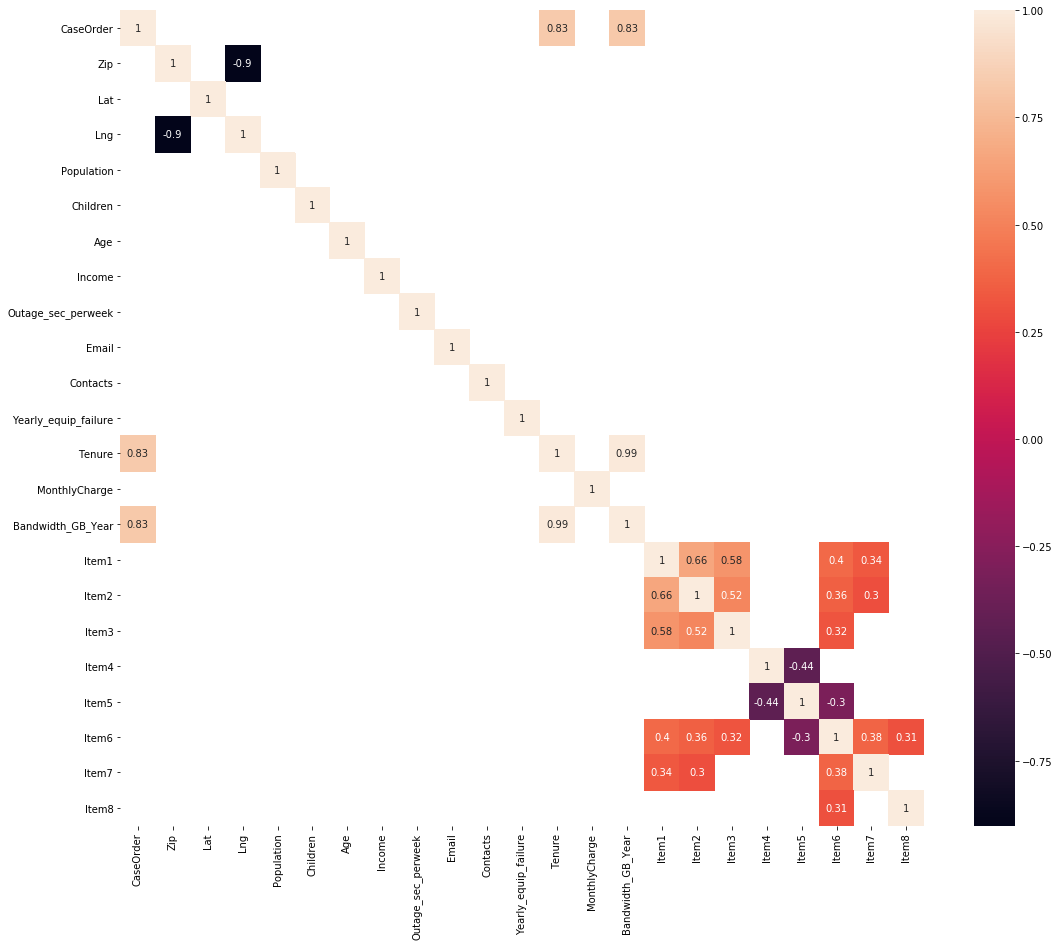

In [15]:
corr= df.corr() # Redifining the correlation matrix.
f,ax = plt.subplots(figsize=(18, 15)) # Set the figure size.
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True); # Figure of the correlation matrix with variables removal

CaseOrder seems to be tied to tenure so we will exclude it in one model, and include it in another model. From our Correlation matrix we can see that the "Items" columns should be taken into consideration as not to cause Multicollinearity. Although the values don't fluctuate much past 6 at most, we will remove a few to be on the safe side. We will remove Item2, Item5, and Item7.

In [16]:
X=df.drop(["Tenure","Techie","Port_modem","Tablet","Phone","Multiple","OnlineSecurity",
           "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
           "PaperlessBilling","Item2","Item5","Item7",
           "Customer_id","Interaction","UID","City","State",
           "County","Zip","Lat","Lng","Age","Gender","CaseOrder","Marital"], axis=1)
Y=df["Tenure"]
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

regression_results(y_test, predictions)

explained_variance:  0.9882
r2:  0.9882
MAE:  2.4655
MSE:  8.2972
RMSE:  2.8805


In [17]:
residuals = y_test - predictions

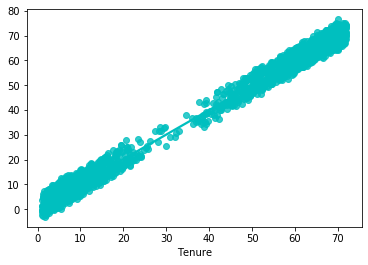

In [18]:
sns.regplot(x=y_test, y=predictions, ci=None, color="c")

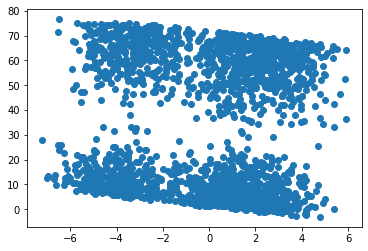

In [19]:
plt.scatter(residuals,predictions)

plt.show()

From looking at the output we can see that our r2 is slightly lower, the removal of our variables has impacted the model, and consequently lowered the statistical significance of the model. We must consider if the opportunity cost is worth it. On one side we have the possibility of multicollinearity and on the other our model is less significant. Since our model is impacted only slightly, and we can test further models, we will not bring these variables back and continue with another model. Caseorder however is highly correlated with our target variable, we will bring caseorder back into our model

## Final Model

In [20]:
X=df.drop(["Tenure","Item2","Item5","Item7","Customer_id",
           "Interaction","UID","City","State","County","Zip",
           "Lat","Lng","Contract","Email","Population","TimeZone","Job","Techie",
           "Port_modem","Tablet","Phone","Multiple","OnlineSecurity",
           "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Marital",
           "PaperlessBilling"], axis=1)
Y=df["Tenure"]
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

regression_results(y_test, predictions)


explained_variance:  0.9896
r2:  0.9896
MAE:  2.3661
MSE:  7.3358
RMSE:  2.7085


In [21]:
residuals = y_test - predictions

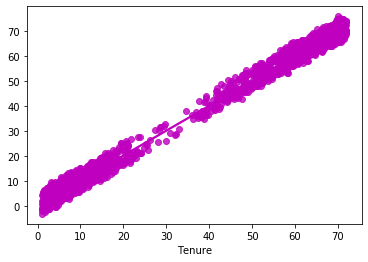

In [22]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

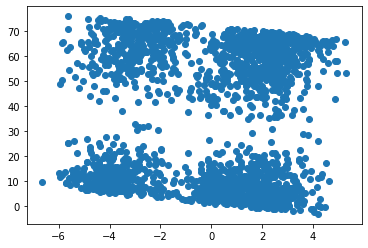

In [23]:
plt.scatter(residuals,predictions)

plt.show()

We reintroduced Caseorder into our model and ajusted to a slightly different set of variables. Our r2 has increased back to it's prvious high. This iteration of the regresssion model however does not include the variables that could potentially cause multicollinearity. Our residual plots remain the same, we can say with confidence that our data is not biased. Our model is now accurate and we have eliminated possible detrimental patterns in our data. 

# Part V: Data Summary and Implications

In [24]:
print(lm.coef_, lm.intercept_)

[ 2.71011417e-04 -1.42767742e-15 -3.73908200e-01  3.87357652e-02
 -1.68653512e-06 -5.55111512e-17  8.32667268e-17 -1.01935290e-03
 -2.63851201e-02 -1.25179207e-02  1.04083409e-17  1.04083409e-17
 -3.86418141e-02  1.17646806e-02  1.07605478e-01 -2.41970057e-02
  5.39377947e-03 -1.98059815e-02 -6.47030086e-02] -1.2430665018832343


We will organize the output

In [25]:
print("Intercept: ", lm.intercept_)
print("Coefficients:")
list(zip(X, lm.coef_))

Intercept:  -1.2430665018832343
Coefficients:


[('CaseOrder', 0.00027101141729654013),
 ('Area', -1.4276774207289122e-15),
 ('Children', -0.37390819951916127),
 ('Age', 0.03873576520184767),
 ('Income', -1.6865351229143928e-06),
 ('Gender', -5.551115123125783e-17),
 ('Churn', 8.326672684688674e-17),
 ('Outage_sec_perweek', -0.0010193529037746934),
 ('Contacts', -0.026385120117596497),
 ('Yearly_equip_failure', -0.012517920743624351),
 ('InternetService', 1.0408340855860843e-17),
 ('PaymentMethod', 1.0408340855860843e-17),
 ('MonthlyCharge', -0.038641814114461236),
 ('Bandwidth_GB_Year', 0.011764680593549182),
 ('Item1', 0.10760547808884614),
 ('Item3', -0.024197005721542007),
 ('Item4', 0.005393779471480153),
 ('Item6', -0.0198059814596106),
 ('Item8', -0.06470300860589057)]

### We write the Mulitple Linear Regression Equation as follows

Tenure = -1.2430665018832343 - (2.71011417e-04 * CaseOrder)-(-1.42767742e-15 * Area)-(-3.73908200e-01 * Children)-
(3.87357652e-02 * Age)-(-1.68653512e-06 * Income)-(-5.55111512e-17 * Gender)-(8.32667268e-17 * Churn)-
(-1.01935290e-03 * Outage_sec_perweek)-(-2.63851201e-02 * Contacts)-(-1.25179207e-02 * Yearly_equip_failure)-
( 1.04083409e-17 * InternetService)-(1.04083409e-17 * PaymentMethod)-(-3.86418141e-02 * MonthlyCharge)-
(1.17646806e-02 * Bandwidth_GB_Year)-(1.07605478e-01 * Item1)-(-2.41970057e-02 * Item3)-
(5.39377947e-03 * Item4)-(-1.98059815e-02 * Item6)-(-6.47030086e-02 * Item8)

#### In linear regression, coefficients are the values that multiply the predictor values. The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases. This is significant because we can see what variables have the strongest correlation. In this case we can observe that InternetService and PaymentMethod have the highest values aside from churn. We are not considering churn because it is already evident that if someone doesn't leave the service then they have longer tenure. The two aforemtioned variables can be taken into consideration when creating future packages, or when determining where to allocate resources for the company to make a return on investment. If the Y value, Tenure, is responsive to these variables. We can increase Tenure by working with and around these variables. 

#### We determined the integrity of the Linear Regression model earlier by comparing the r2, and also the possibility of Multicollinearity. Our final model has a high r2 and low chance of multicollinearity since we filtered out variables that might impact each other. The residual plots also point towards model integrity as mentioned earlier. 

#### A limitation of Multiple Linear Regression is the quality of the data and the uniqueness of it. We reduced our data with a correlation matrix but it is still hard to determine with certainty whether the independent variables are connected in some way. We are equiped with our understanding of the uniqueness of the data, and further investigation is required to determine if the dats in correlated in ways that we did not quite frame for the question at hand. 